In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [4]:
def plot_data(x, y, ax):
    pos = y == 1
    neg = y == 0
    
    pos = pos.reshape(-1)
    ax.scatter(x[pos, 0], x[pos, 1], marker="x", c='r')
    ax.scatter(x[neg, 0], x[neg, 1], c="b")

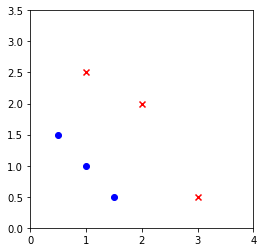

In [10]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))
ax.axis([0, 4, 0, 3.5])
plot_data(X_train, y_train, ax)

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
def compute_cost(x, y, w, b):
    m, n = x.shape
    j_wb = 0
    
    for i in range(m):
        f_z = sigmoid(np.dot(x[i], w) + b)
        j_wb += (-y[i]*np.log(f_z)) - ((1 - y[i])*np.log(1 - f_z))
    
    return j_wb / m

In [17]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = sigmoid(np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    return dj_dw / m, dj_db / m

In [18]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
        
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i} \t Cost: {j_hist[i]}")
    
    return w, b, j_hist

In [24]:
w_in = np.zeros(X_train.shape[1])
b_in = 0
alpha = 0.9
num_iter = 3000
w, b, j_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)

Iteration 0 	 Cost: 0.6509898706978229
Iteration 300 	 Cost: 0.06289392170962528
Iteration 600 	 Cost: 0.03167855870694084
Iteration 900 	 Cost: 0.021103215376538823
Iteration 1200 	 Cost: 0.015808251462432754
Iteration 1500 	 Cost: 0.012633492638369192
Iteration 1800 	 Cost: 0.010519184271839925
Iteration 2100 	 Cost: 0.009010491114471844
Iteration 2400 	 Cost: 0.007879992749437152
Iteration 2700 	 Cost: 0.007001407511457648


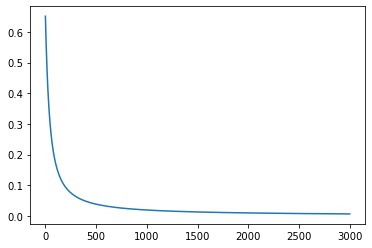

In [25]:
plt.plot(j_hist)
plt.show()

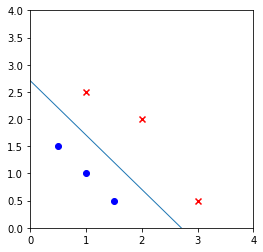

In [34]:
fig, ax= plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
x0 = -b/w[0]
x1 = -b/w[1]

plt.plot([0, x0], [x0, 0], lw=1)